# **Project  Name-**
## Uber Supply Demand Gap analysis

* Project Description 

This project analyzes Uber ride request data to identify and address supply-demand gaps in cab availability using Exploratory Data Analysis (EDA) techniques. The objective is to uncover patterns of trip completion, cancellations, and unavailability across different time slots, locations, and days of the week, and to provide actionable business insights.

Using Python (Pandas, Seaborn, Matplotlib), SQL, and Excel, I cleaned and explored the dataset, visualized demand distribution trends, and calculated the percentage of unmet demand due to cancellations and unavailability. The analysis revealed that the Airport pickup point during Night and Early Morning slots faces the highest demand gap due to driver unavailability and cancellations.

 Tools & Techniques Used:
Python: Pandas, NumPy, Matplotlib, Seaborn for EDA and visualization

SQL: Aggregation and filtering queries for insights

Excel: Data cleaning and dashboard creation

Pivot Tables & Charts: For summary and presentation

--Key Insights:
Night & Early Morning slots have the highest supply-demand gaps.

Airport to City route sees the most unmet demand.

Majority of failed requests are due to cancellations in the morning and no cars at night.

Suggested solutions include incentive-based night shifts and rush hour pricing to motivate drivers.

This project demonstrates practical skills in data cleaning, visualization, and business-oriented analysis, making it suitable for decision-making and operational improvements in ride-hailing services.

## Import Libreries ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data 

In [7]:
Uber= pd.read_csv("C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\Uber_Data1.csv")
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp.1,Request timestamp.2,Drop timestamp.1,Drop timestamp.2,Day Name,Hour,Slot
0,619,Airport,1,Trip Completed,7/11/2016,11:51:00,7/11/2016,13:00:00,Monday,11,Morning
1,867,Airport,1,Trip Completed,7/11/2016,17:57:00,7/11/2016,18:47:00,Monday,17,Evening
2,1807,City,1,Trip Completed,7/12/2016,9:17:00,7/12/2016,9:58:00,Tuesday,9,Morning
3,2532,Airport,1,Trip Completed,7/12/2016,21:08:00,7/12/2016,22:03:00,Tuesday,21,Night
4,3112,City,1,Trip Completed,7/13/2016,8:33:16,7/13/2016,9:25:47,Wednesday,8,Morning


## Clean Data

In [14]:
# Check for nulls
print(Uber.isnull().sum())

# Strip and lowercase column names for consistency
Uber.columns = Uber.columns.str.strip().str.replace(" ", "_").str.lower()

# Convert date/time columns
Uber['request_timestamp.1'] = pd.to_datetime(Uber['request_timestamp.1'], errors='coerce')
Uber['drop_timestamp.1'] = pd.to_datetime(Uber['drop_timestamp.1'], errors='coerce')

# Handle missing or inconsistent status values
Uber['status'] = Uber['status'].str.strip().str.lower()
Uber['pickup_point'] = Uber['pickup_point'].str.strip().str.title()

# Check basic info
Uber.info()


request_id             0
pickup_point           0
driver_id              0
status                 0
request_timestamp.1    0
request_timestamp.2    0
drop_timestamp.1       0
drop_timestamp.2       0
day_name               0
hour                   0
slot                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   request_id           6745 non-null   int64         
 1   pickup_point         6745 non-null   object        
 2   driver_id            6745 non-null   int64         
 3   status               6745 non-null   object        
 4   request_timestamp.1  6745 non-null   datetime64[ns]
 5   request_timestamp.2  6745 non-null   object        
 6   drop_timestamp.1     6745 non-null   datetime64[ns]
 7   drop_timestamp.2     6745 non-null   object        
 8   day_name             6745 non-

## Trip Status 

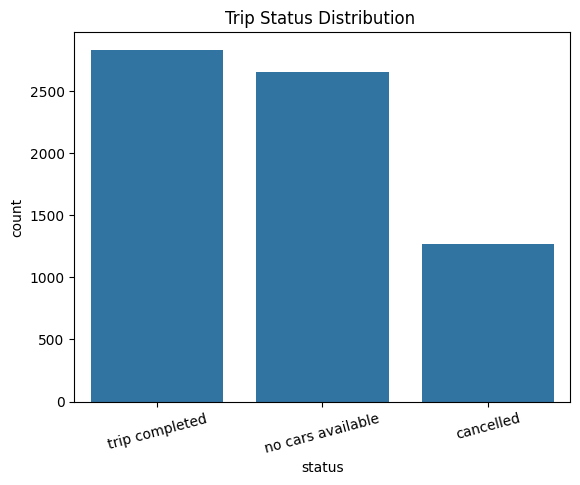

In [18]:
plt.Figure (figsize=(6,4))
sns.countplot(data=Uber, x='status', order=Uber['status'].value_counts().index)
plt.title ("Trip Status Distribution ")
plt.xticks(rotation=15)
plt.show()

## Demand By Hour

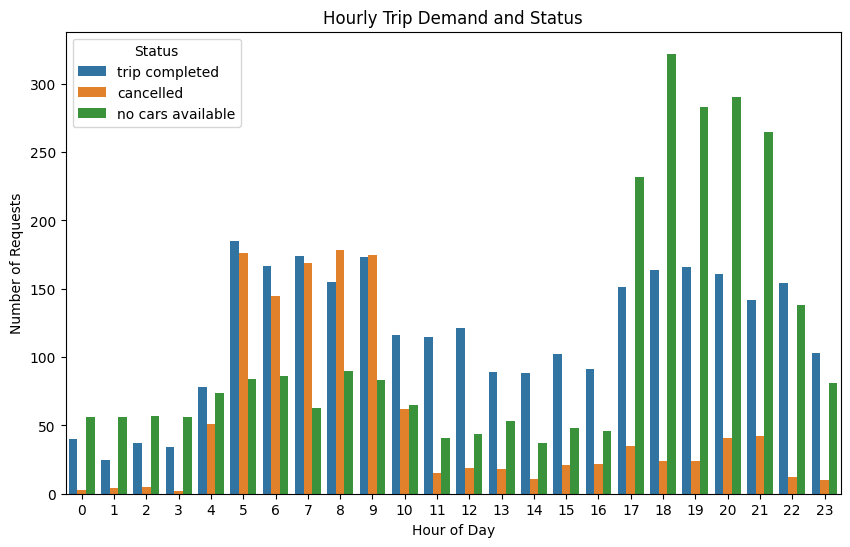

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=Uber, x='hour', hue='status')
plt.title("Hourly Trip Demand and Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.legend(title='Status')
plt.show()


## Pickup point vs Trip Status

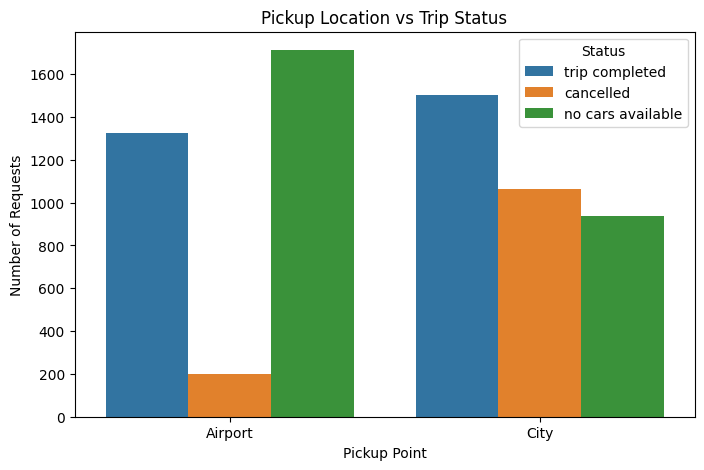

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=Uber, x='pickup_point', hue='status')
plt.title("Pickup Location vs Trip Status")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()


## Day-Wise Demand

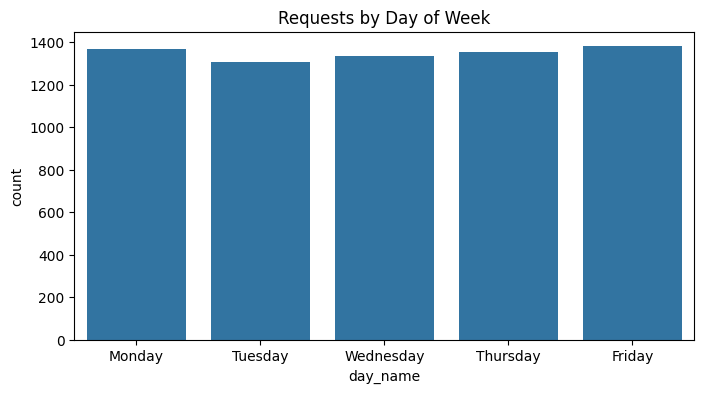

In [23]:
plt.figure(figsize=(8,4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sns.countplot(data=Uber, x='day_name', order=order)
plt.title("Requests by Day of Week")
plt.show()


## Calculate Supply-Demand Gap

In [24]:
gap_data = Uber.groupby(['slot', 'pickup_point'])['status'].value_counts().unstack().fillna(0)

# Create a gap column
gap_data['gap'] = gap_data.get('no cars available', 0) + gap_data.get('cancelled', 0)
gap_data['total'] = gap_data.sum(axis=1)
gap_data['gap_percent'] = (gap_data['gap'] / gap_data['total']) * 100

gap_data.sort_values('gap_percent', ascending=False)


status                      cancelled  no cars available  trip completed  \
slot          pickup_point                                                 
Evening       Airport            78.0             1067.0           312.0   
Early Morning City              526.0              263.0           327.0   
Night         Airport            31.0              390.0           203.0   
Morning       City              406.0              245.0           316.0   
Mid Night     City               14.0              111.0            69.0   
              Airport             0.0              114.0            67.0   
Afternoon     City               41.0              164.0           266.0   
Night         City               33.0               94.0           196.0   
Afternoon     Airport            50.0               64.0           225.0   
Evening       City               46.0               60.0           330.0   
Morning       Airport            24.0               34.0           243.0   
Early Morning Airport            15.0               44.0           277.0   

status                         gap   total  gap_percent  
slot          pickup_point                               
Evening       Airport       1145.0  2602.0    44.004612  
Early Morning City           789.0  1905.0    41.417323  
Night         Airport        421.0  1045.0    40.287081  
Morning       City           651.0  1618.0    40.234858  
Mid Night     City           125.0   319.0    39.184953  
              Airport        114.0   295.0    38.644068  
Afternoon     City           205.0   676.0    30.325444  
Night         City           127.0   450.0    28.222222  
Afternoon     Airport        114.0   453.0    25.165563  
Evening       City           106.0   542.0    19.557196  
Morning       Airport         58.0   359.0    16.155989  
Early Morning Airport         59.0   395.0    14.936709

## Heatmap of Gap

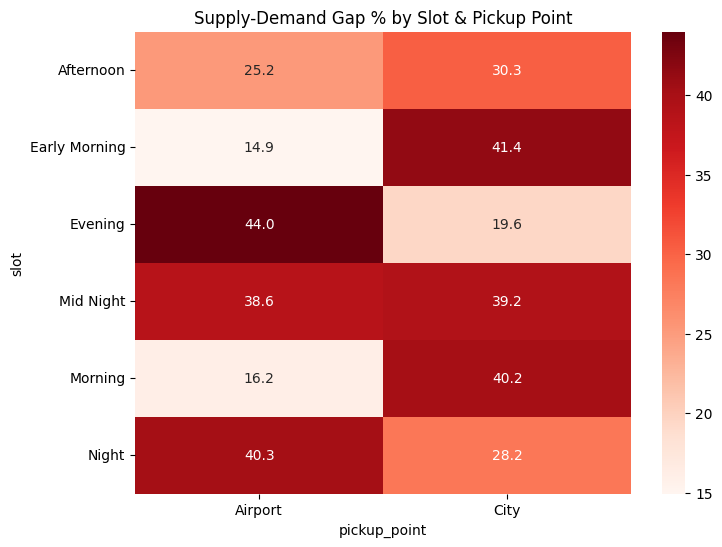

In [ ]:
pivot_gap = gap_data.reset_index().pivot(index='slot', columns='pickup_point', values='gap_percent')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_gap, annot=True, cmap='Reds', fmt=".1f")
plt.title("Supply-Demand Gap % by Slot & Pickup Point")
plt.show()
